insert group name here

put our names here


Azumi Abadilla, 27406289
Mariam Mulatu 74233297

Within this project, we are going to look into the possible connections between multiple factors within two data sets, and see if we can find patterns that can be used to predict important information. More specifically, we ask the question: 

Can experience, age, and subscription status predict whether a player has high engagement (high hours played)?

To answer this question, we used both the sessions and players data set. 

The sessions data set consists of five different columns:
hashedEmail: A chr column, it gives an encrypted 32 digit code for each user's email.
start_time: A chr column, it gives the year, month, date, and time at the start of the session.
end_time: a chr column, same as start_time, marks when they end their session.
original_start_time: a dbl column that records the original start time.
original_end_time: a dbl column that records the original end time.


There are 1535 rows within the sessions data set, which lands our total observations at 7675. 
WIthin the players data set, there are seven different columns:
Experience; is a chr column, and states if someone is one of five different categories: -Amateur -Pro -Veteran -Regular -Beginner
Subscribe; is a lgl column, and gives either a TRUE or FALSE to if the person has subscribed.
hashedEmail; is a chr column, and gives an encrypted 32 digit code for each users email.
played_hours; is a dbl column, and gives us the amount of total time the players played for. The average was 5.845918 hours.
name; is a chr column which records the first name of the player.
gender; is a chr column with seven different variables. The most common was Male, and the least was Other.
Age; is a dbl column, which records the age of the player. The largest value was 18, and the mean was 20.5.


From these twelve columns, we were most interested in start/end time, age, experience, subscription and hours played, as we believed that these would be the most instrumental to answering our question. We figured this out from the individual stage of the project, in which separate members did predictive graphs that showed that these columns would have the most predictive validity.  


In [2]:
library(tidyverse)
library(repr)
library(tidymodels)
library(recipes)
options(repr.matrix.max.rows = 6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

At the beginning, we needed to load in our data, but since our code had to run all within a single file, we couldn’t use a pathway. Instead, we created a file within Github, that we could download using the download.file function, which we could then read, using the read_csv function. 

In [3]:
PLAYERS_DATA_URL = "https://raw.githubusercontent.com/Bumblet3a/dsci-individual-project/refs/heads/main/players.csv"
SESSION_DATA_URL = "https://raw.githubusercontent.com/Bumblet3a/dsci-individual-project/refs/heads/main/sessions.csv"

download.file(PLAYERS_DATA_URL, "players.csv")
download.file(SESSION_DATA_URL, "sessions.csv")

players <- read_csv("players.csv")
head(players)
sessions_data <- read_csv("sessions.csv")

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
player_sessions <- merge(sessions_data, players, all = TRUE)|>
select(Age, experience, subscribe, played_hours)|>
drop_na(Age:played_hours)
player_sessions

Age,experience,subscribe,played_hours
<dbl>,<chr>,<lgl>,<dbl>
20,Regular,TRUE,1.5
20,Regular,TRUE,1.5
17,Veteran,TRUE,0.0
⋮,⋮,⋮,⋮
23,Amateur,TRUE,56.1
17,Amateur,TRUE,0.1
20,Beginner,TRUE,1.1


In [10]:
players_split <- initial_split(player_sessions, prop = 0.75, strata = played_hours)
players_testing <- testing(players_split)
players_training <- training(players_split)

We now had two separate data sets, “players” and “sessions_data”. The next step was to combine them, as our questions used columns from both data sets. To do that, we used the merge function, which created a data set that contained both the sessions_data and the players observations called player_sessions. From there, we needed to select the columns we wanted to put into our regression model. We selected Age, experience, subscribe, and played_hours as our 4 columns. We also dropped any NA’s within the data set, to make sure our predictions were accurate. 


In [11]:
#azumi testing code cell 
#works
players_training <- players_training |>
  mutate(played_hours = as.numeric(played_hours))
players_testing <- players_training |>
  mutate(played_hours = as.numeric(played_hours))

players_recipe <- recipe(played_hours ~ Age + experience + subscribe, data = players_training) |>
  step_dummy(experience) |>
  step_mutate(subscribe = as.numeric(subscribe)) |>
  step_scale(all_numeric_predictors()) |>
  step_center(all_numeric_predictors())


players_spec <- nearest_neighbor(weight_func = "rectangular",
                                 neighbors = tune())|>
                set_engine("kknn")|>
                set_mode("regression")

players_vfold <- vfold_cv(data = players_training, v = 5, strata = played_hours)

players_wf <- workflow()|>
add_recipe(players_recipe)|>
add_model(players_spec)
players_wf


══ Workflow ════════════════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
4 Recipe Steps

• step_dummy()
• step_mutate()
• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────
K-Nearest Neighbor Model Specification (regression)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [12]:
#azumi testing code cell
#works
players_gridvals <- tibble (neighbors = seq(from = 1, to = 100, by = 10))

players_results <- players_wf|>
tune_grid(resamples = players_vfold, grid = players_gridvals)|>
collect_metrics()

players_min <- players_results |>
filter(.metric == "rmse")|>
slice_min(mean, n = 1)

k_players_min <- players_min |>
pull(neighbors)
k_players_min


[1] 41

In [13]:
#azumi testing code cell
#retraining now with k value
#works

players_best_spec <- nearest_neighbor(weight_func = "rectangular",
                    neighbors = k_players_min)|>
                    set_engine("kknn")|>
                    set_mode("regression")

players_best_fit <- workflow()|>
add_recipe(players_recipe)|>
add_model(players_best_spec)|>
fit(data = players_training)


players_summary <- players_best_fit|>
predict(players_testing)|>
bind_cols(players_testing)|>
metrics(truth = played_hours, estimate = .pred)|>
                filter(.metric == "rmse")
players_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
rmse,standard,37.20765


In [14]:
#azumi test code cell

players_prediction <- players_best_fit |> predict(players_training) |>
bind_cols(players_training)


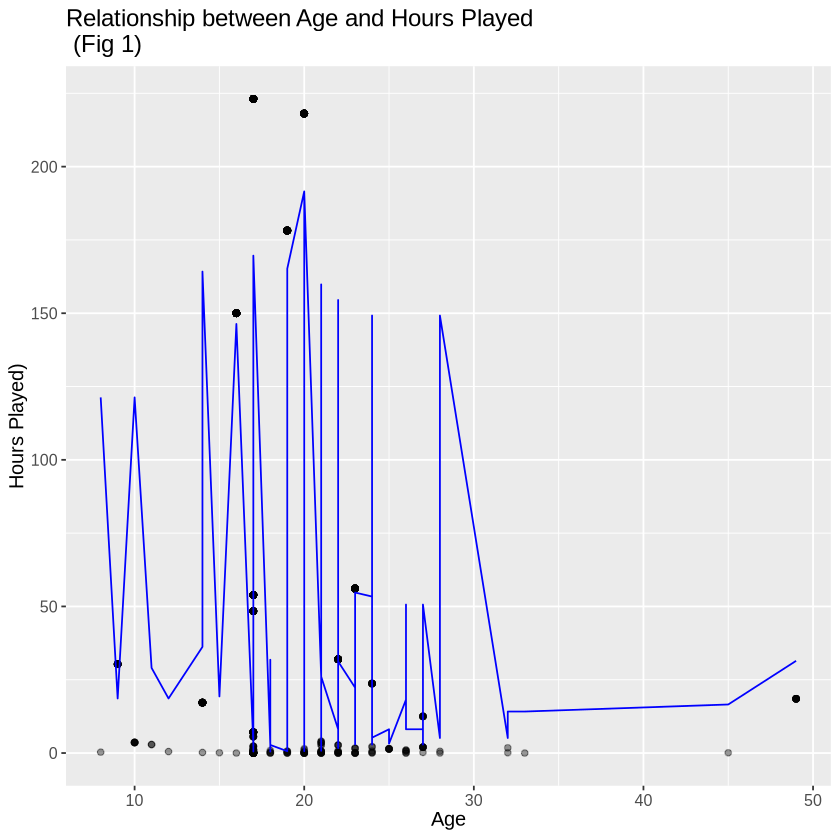

In [15]:
#azumi test code cell
#based off of question 9 in regression 1 worksheet
#ggplot, visualization
#NEED TO ADD FIGURE NUMBER 
#AGE

players_pred_plot_age <- players_prediction |>
ggplot(aes(x = Age, y = played_hours)) +
geom_point (alpha = 0.4) +
geom_line(data = players_prediction,
mapping = aes (x = Age, y = .pred),
color = "blue") +
labs (title = "Relationship between Age and Hours Played \n (Fig 1)",
x = "Age",
y = "Hours Played)" )+
theme (text = element_text(size = 12))

players_pred_plot_age

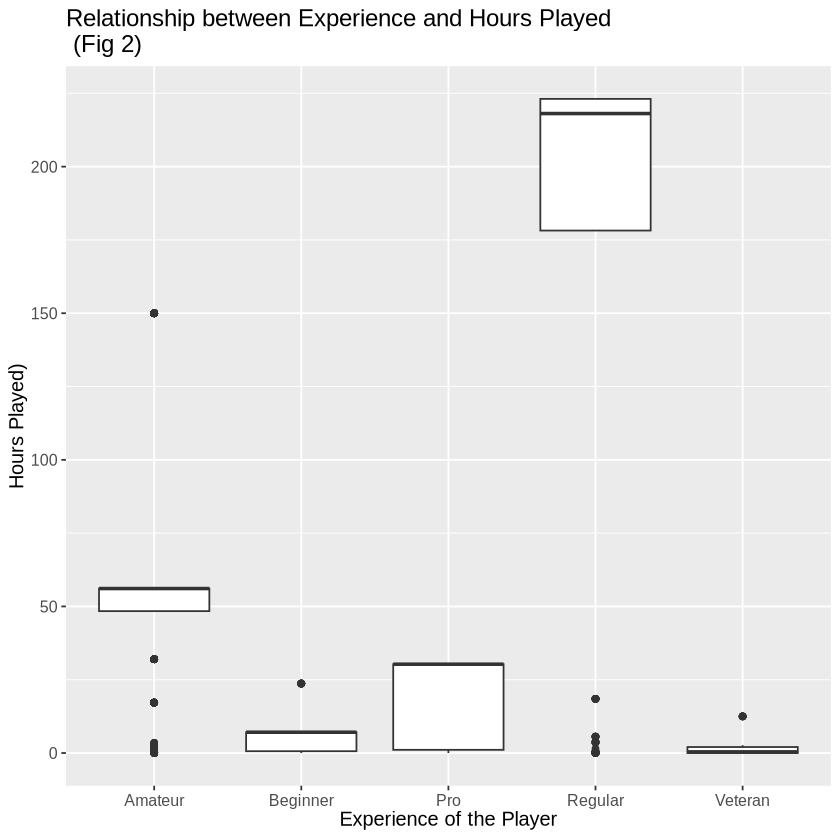

In [16]:
#azumi test code cell
#based off of question 9 in regression 1 worksheet
#ggplot, visualization
#NEED TO ADD FIGURE NUMBER 
#EXPERIENCE

players_pred_plot_exp <- players_prediction |>
ggplot(aes(x = experience, y = played_hours)) +
geom_boxplot() +
labs (title = "Relationship between Experience and Hours Played\n (Fig 2)",
x = "Experience of the Player",
y = "Hours Played)" )+
theme (text = element_text(size = 12))

players_pred_plot_exp

In [17]:
sessions <- sessions_data |>
    separate(start_time, into = c("Date", "Time"), sep = " ") |>
    separate(Date, into = c("Day", "Month", "Year"), sep = "/") |>
    separate(end_time, into = c("EDate", "ETime"), sep = " ") |>
    separate(EDate, into = c("EDay", "EMonth", "EYear"), sep = "/") |>
    mutate(Day = as.numeric(Day), EDay = as.numeric(EDay),
           Month = as.numeric(Month), EMonth = as.numeric(EMonth), 
           Year = as.numeric(Year), EYear = as.numeric(EYear)) |>
    separate(Time, into = c("Hour", "Minute"), sep = ":") |>
    separate(ETime, into = c("EHour", "EMinute"), sep = ":") |>
    mutate(Hour = as.numeric(Hour), EHour = as.numeric(EHour),
           Minute = as.numeric(Minute), EMinute = as.numeric(EMinute)) |>

    #Filter out rows that contain sessions that lasted more than a day(these data points are probably outliers)

    filter(Day==EDay & Month==EMonth & Year==EYear)



sessions

hashedEmail,Day,Month,Year,Hour,Minute,EDay,EMonth,EYear,EHour,EMinute,original_start_time,original_end_time
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30,6,2024,18,12,30,6,2024,18,24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17,6,2024,23,33,17,6,2024,23,46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25,7,2024,17,34,25,7,2024,17,57,1.72193e+12,1.72193e+12
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,28,7,2024,15,36,28,7,2024,15,57,1.72218e+12,1.72218e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,25,7,2024,6,15,25,7,2024,6,22,1.72189e+12,1.72189e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,20,5,2024,2,26,20,5,2024,2,45,1.71617e+12,1.71617e+12


average_time,median_time,sd_time
<dbl>,<dbl>,<dbl>
46.85982,26,51.73255


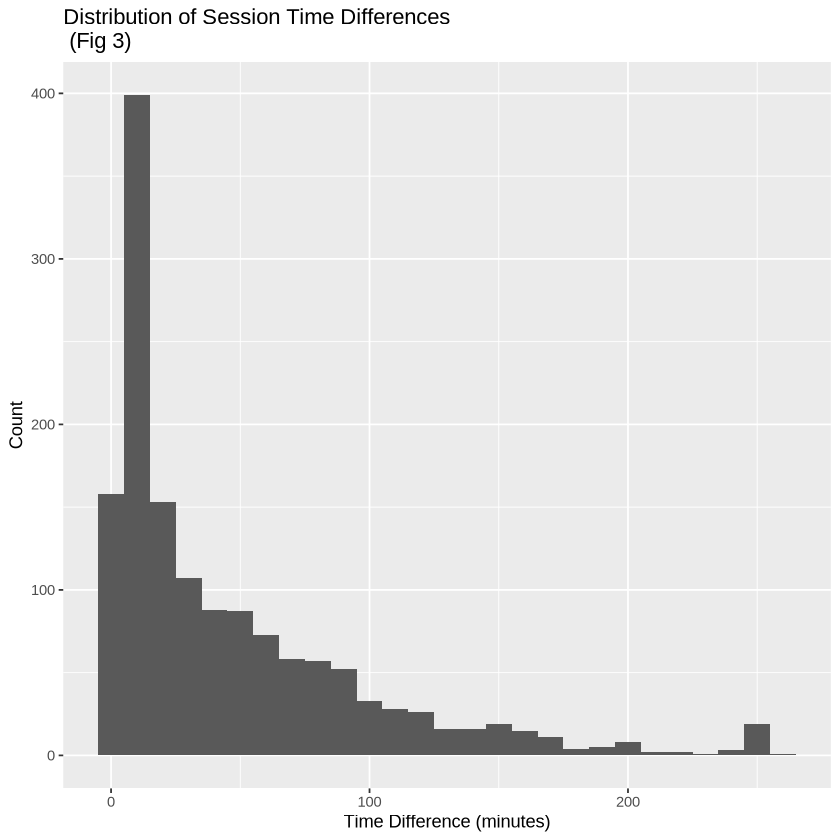

In [19]:
sessions_time_diff <- sessions |>
    mutate(time_diff = (EHour - Hour) * 60 + (EMinute - Minute))


time_stats <- sessions_time_diff |>
    summarize(average_time = mean(time_diff, na.rm = TRUE),
              median_time = median(time_diff, na.rm = TRUE),
              sd_time = sd(time_diff, na.rm = TRUE))


sessions_visualization <- sessions_time_diff |>
    ggplot(aes(x = time_diff)) +
    geom_histogram(binwidth = 10) +
    labs(title = "Distribution of Session Time Differences \n (Fig 3)",
         x = "Time Difference (minutes)",
         y = "Count")

sessions_visualization
time_stats

# Skewed right distribution where most people had sessions that lasted less than 60 minutes



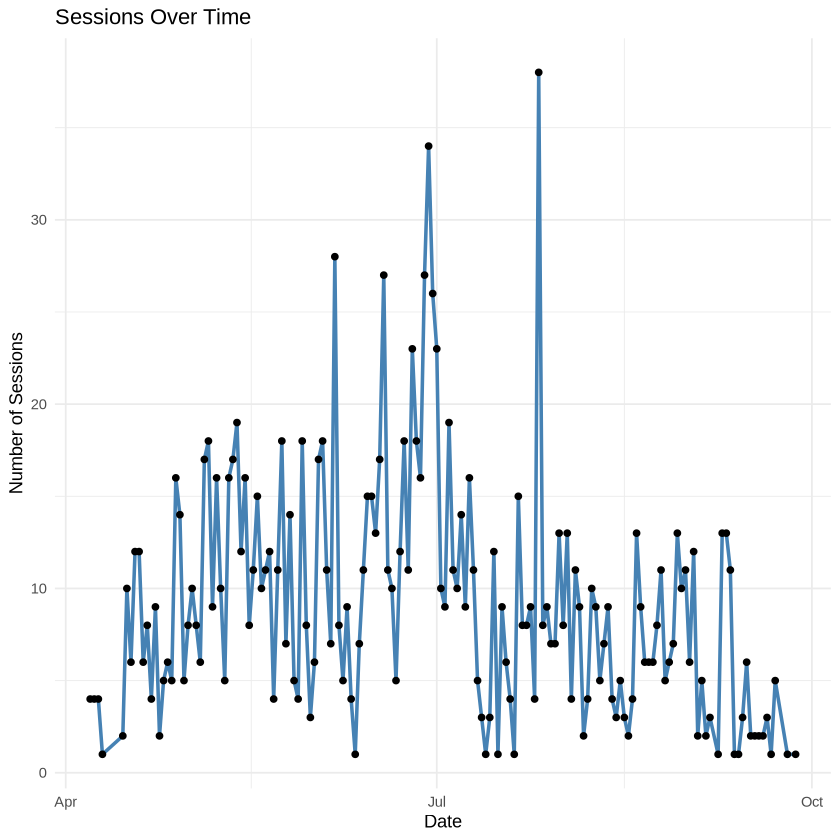

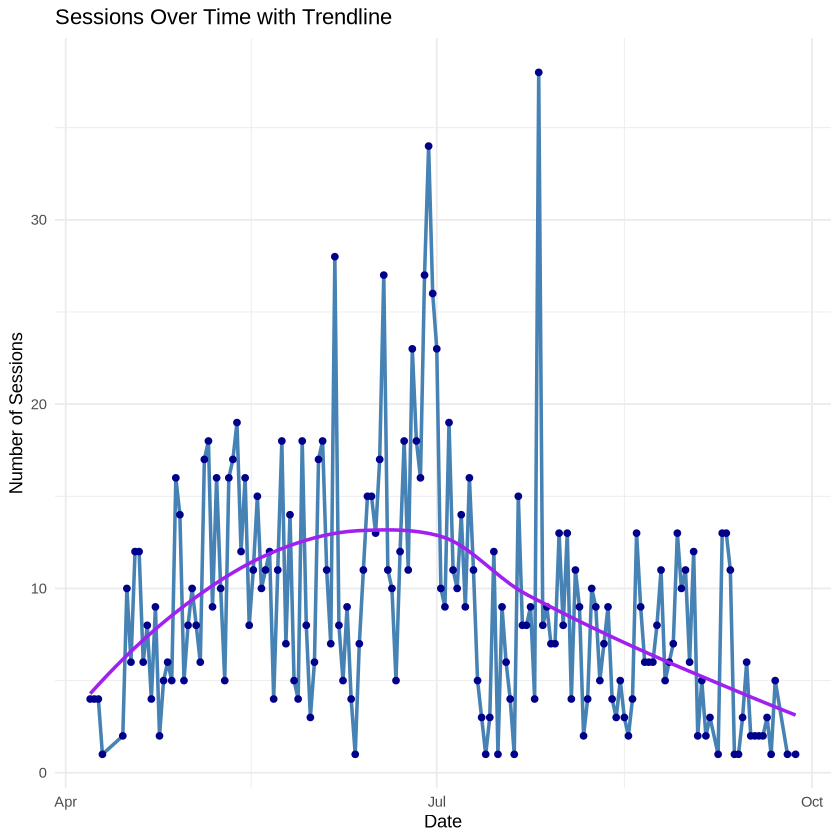

In [20]:
sessions_over_time <- sessions_data |>
  mutate(
    start = lubridate::dmy_hms(start_time),
    date = as.Date(start)
  ) |>
  group_by(date) |>
  summarise(session_count = n()) |>
  arrange(date)

#Mariam: sessions over time to help show peak months of game play
#We can say how theres more sessions around summer months with dips around autumn
#we can tie that in with ages and say being out of school during summer break can cause an increase in play time
ggplot(sessions_over_time, aes(x = date, y = session_count)) +
  geom_line(color = "steelblue", linewidth = 1) +    
  geom_point(color = "black", size = 1.5) +      
  labs(
    title = "Sessions Over Time",
    x = "Date",
    y = "Number of Sessions"
  ) +
  theme_minimal()

 # adding a smoothing trendline to maybe make it more clear maybe?

ggplot(sessions_over_time, aes(x = date, y = session_count)) +
  geom_line(color = "steelblue", linewidth = 1) + 
  geom_point(color = "darkblue", size = 1.5) +    
  geom_smooth(method = "loess", formula = y ~ x, se = FALSE, color = "purple", linewidth = 1) + 
  labs(
    title = "Sessions Over Time with Trendline",
    x = "Date",
    y = "Number of Sessions"
  ) +
  theme_minimal()

In [ ]:
sessions_time_diff |>
  filter(time_diff > 0, time_diff < 300) |>
  left_join(players, by = "hashedEmail") |>
  ggplot(aes(x = experience, y = time_diff, fill = experience)) + 
  geom_boxplot() + 
  labs(
    title = "Session Duration by Experience Level",
    x = "Experience Level",
    y = "Session Duration (minutes)"
  ) +
  theme_minimal() + 
  scale_fill_brewer(palette = "Set3")  
#bar plot helps focus on usual lengths without focusing on outliers, so more relevant comparisions between experience levels
#colours just for clarity
#differences between experiences answer whether subscription status predicts whether a player has high engagement. 


## Sessions Data Analysis

# Distribution Plot:
To create a distribution plot that visualizes the time differences in players' sessions, a new data frame was created with a column that calculates the time length of sessions by finding the difference between the start and ending hours, multiplying by 60, and adding the difference between the start and ending minutes. By using this column as the x-axis of a historgram with counts on the y-axis, the distribution of the length of player time sessions can be seen. The histogram depicts a skewed right distribution that has a mean play time of around 46 minutes, median time of 26 minutes, and standard deviation of 51 minutes. This large difference between the mean and median values of session time indicates that a majority of session times lie under 30 minutes, while large outlier session times are influencing the mean by increasing the overall average for the session times.